In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math
%matplotlib inline

In [2]:
distance=lambda x,y:math.sqrt(x*x+y*y)
def RadianLength(A,Z):
    X_0=(716*A)/(Z*(Z+1)*math.log(287/math.sqrt(Z))) #gcm^-2
 
    return X_0

def RadionLengthMulti():
    #Sodium
    NaA=22.9
    NaZ=11
    #Iodine
    IA=126.9
    IZ=53
    TotalMass=NaA+IA
    X_0_Sodium=RadianLength(NaA,NaZ)
    X_0_Iodine=RadianLength(IA,IZ)
    Total=((NaA/TotalMass)/X_0_Sodium)+((IA/TotalMass)/X_0_Iodine)
    return 1/Total

def DepthofShower(lowE,HighE,X_0,Z):
    
    Energys=[]
    MaxDepth=[]
    E_c=((610)/(Z+1.24))/1000 # MeV
    print(E_c)
    for i in range(lowE,HighE):   
        X_max=(X_0*math.log(i/E_c))/math.log(2)
        Energys.append(i)
        MaxDepth.append(X_max)
    Total=np.array([Energys,MaxDepth])
    return Total


    

In [3]:


ArgonX_0=RadianLength(40,18)
NaIX_0=RadionLengthMulti()
ArgonXmax=DepthofShower(1,100,ArgonX_0,18)
NaIXmax=DepthofShower(1,100,NaIX_0,64)
print(f"Argon Radiation Length is {round(ArgonX_0,2)} gcm^-2")
print(f"NaI Radiation Length is {round(NaIX_0,2)} gcm^-2")

0.03170478170478171
0.00935009196811772
Argon Radiation Length is 19.87 gcm^-2
NaI Radiation Length is 9.66 gcm^-2


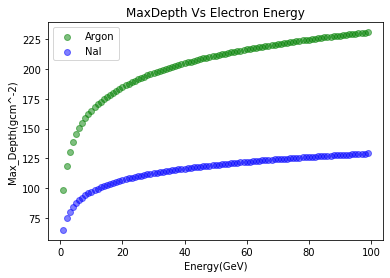

In [4]:
plt.figure()
plt.title("MaxDepth Vs Electron Energy")
plt.scatter(ArgonXmax[0],ArgonXmax[1],c="g", alpha=0.5,
            label="Argon")
plt.scatter(NaIXmax[0],NaIXmax[1],c="b", alpha=0.5,
            label="NaI")
plt.legend(loc='upper left')
plt.ylabel('Max_Depth(gcm^-2)')
plt.xlabel("Energy(GeV)")
plt.show()

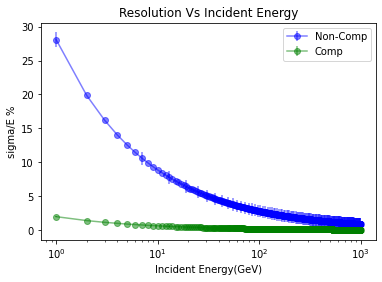

In [5]:
#Problem 3
EnergyRescomp=[]
EnergyRes=[]
IncidentE=[]
e=(99*2)/100#%
h=(70*40)/100 #%

e2=(70*2)/100#%
h2=(70*2)/100 #%
errore=0.5/100
errorh=0.4/100


for i in range(1,1000):
    sigma_e=e/math.sqrt(i)
    sigma_h=h/math.sqrt(i)
    sigma_ec=e2/math.sqrt(i)
    sigma_hc=h2/math.sqrt(i)
    
    EnergyRes.append(distance(sigma_e,sigma_h))
    EnergyRescomp.append(distance(sigma_ec,sigma_hc))

    IncidentE.append(i)
        
Error=distance(errore,errorh)
EnergyRes=np.array(EnergyRes)
EnergyRescom=np.array(EnergyRescomp)

e1=min(EnergyRes)+ (Error * EnergyRes)

e2=min(EnergyRescomp)+(Error*EnergyRescom)
plt.figure()
plt.title("Resolution Vs Incident Energy")
plt.errorbar(IncidentE,EnergyRes,yerr=e1,errorevery=6 ,fmt='-o',c="b",alpha=0.5,
            label="Non-Comp")
plt.errorbar(IncidentE,EnergyRescomp,yerr=e2, errorevery=6,fmt='-o',c="g", alpha=0.5,
            label="Comp")

ax=plt.gca()
ax.set_xscale('log')
plt.legend(loc='upper right')
plt.ylabel('sigma/E %')
plt.xlabel("Incident Energy(GeV)")
plt.show()

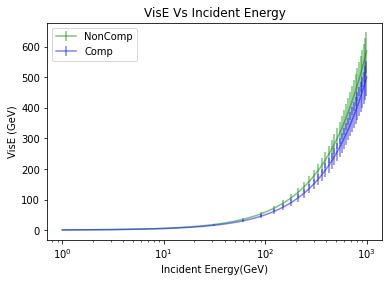

In [6]:
#Problem 3
EnergyVis=[]
EnergyVisComp=[]

IncidentE=[]
e=99/100 #%
h=70/100 #%

h2=70/100
e2=70/100


errore=5/100
errorh=10/100
Error=distance(errore,errorh)

for i in range(1,1001):
    EvisComp=(e2/(h2+e2))*i
    Evis=(e/(h+e))*i
    EnergyVis.append(Evis)
    EnergyVisComp.append(EvisComp)
    IncidentE.append(i)
    
    wPrb2.ipynb
EnergyVis=np.array(EnergyVis)
EnergyVisComp=np.array(EnergyVisComp)    
e1=min(EnergyVis)+ (Error * EnergyVis)

e2=min(EnergyVisComp)+(Error*EnergyVisComp)


plt.figure()
plt.title("VisE Vs Incident Energy")

plt.errorbar(IncidentE,EnergyVis,c="g",yerr=e1,errorevery=30 , alpha=0.5,
            label="NonComp")
plt.errorbar(IncidentE,EnergyVisComp,c="b",yerr=e2,errorevery=30 , alpha=0.5,
            label="Comp")
ax=plt.gca()
ax.set_xscale('log')
plt.legend(loc='upper left')
plt.ylabel('VisE (GeV)')
plt.xlabel("Incident Energy(GeV)")
plt.show()

Text(0.5, 0, 'Vmin ')

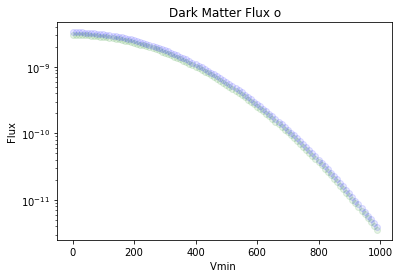

In [76]:
#PRoblem 4
def P4(v0,y):
    v0=v0*1000
    sigma=math.sqrt(1.5)*220*1000
    v=(222 + 15*np.sin(2*np.pi*y))*1000
    n=0.3 #cm^2
    f=1/(math.sqrt(2*np.pi)*sigma*100)*np.exp(-(v0*v0+v*v)/(2*sigma*sigma))


    r1=n*f
    return r1

x=np.arange(0,1000,10)
Dis2=[]
Dis=[]
Ve=[]

for i in x:
    Dis.append(P4(i,0.25))
    Dis2.append(P4(i,0.75))

Dis=np.array(Dis)    
plt.figure()
plt.title("Dark Matter Flux o")
ax=plt.gca()
ax.set_yscale('log')
plt.scatter(x,Dis,c="g", alpha=0.1,
            label="Flux of DM")
plt.scatter(x,Dis2,c="b", alpha=0.1,
            label="Flux of DM")
plt.ylabel('Flux')
plt.xlabel("Vmin ")
